In [2]:
!pip install pandas matplotlib seaborn textblob wordcloud

  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached nltk-3.9.3-py3-none-any.whl.metadata (3.2 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
   ---------------------------------------- 0.0/307.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/307.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/307.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/307.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/307.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/307.2 kB 119.1 kB/s eta 0:00:03
   ----- --------------------------------- 41.0/307.2 kB 140.3 kB/s eta 0:00:02
   ------------- ------------------------ 112.6/307.2 kB 364.4 kB/s eta 0:00:01
   -------------------------- ----------- 215.0/307.2 kB 656.4 kB/s eta 0:00:01
   -------------------------------------- 307.2/307.2 kB 827.2 kB/s eta 0:00:00
Using cached nltk-3.9.3-py3-none-any.whl (1.5 MB)
  Attempti

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [8]:
import pandas as pd

df = pd.read_csv("social_media_sentiment.csv")
print(df.head())



   id                                        text  brand
0   1        I love the new iPhone camera quality  Apple
1   2  Battery life is terrible and disappointing  Apple
2   3       Amazing performance and smooth design  Apple
3   4             Customer service was rude today  Apple
4   5        The new update is fantastic and fast  Apple


In [9]:
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

df['polarity'] = df['text'].apply(get_sentiment)


In [10]:
def classify_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['polarity'].apply(classify_sentiment)

print(df[['text', 'sentiment']].head())


                                         text sentiment
0        I love the new iPhone camera quality  Positive
1  Battery life is terrible and disappointing  Negative
2       Amazing performance and smooth design  Positive
3             Customer service was rude today  Negative
4        The new update is fantastic and fast  Positive


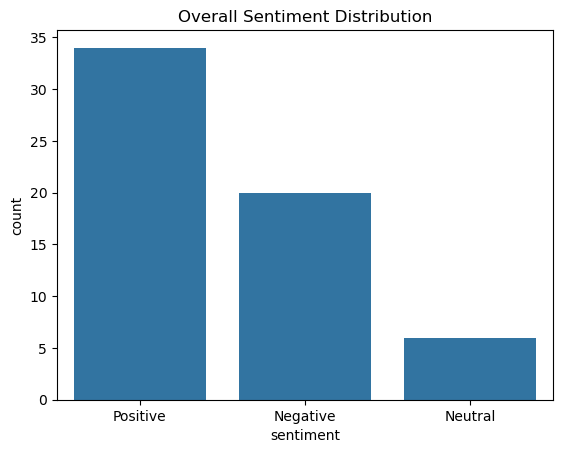

In [11]:
sns.countplot(x='sentiment', data=df)
plt.title("Overall Sentiment Distribution")
plt.show()


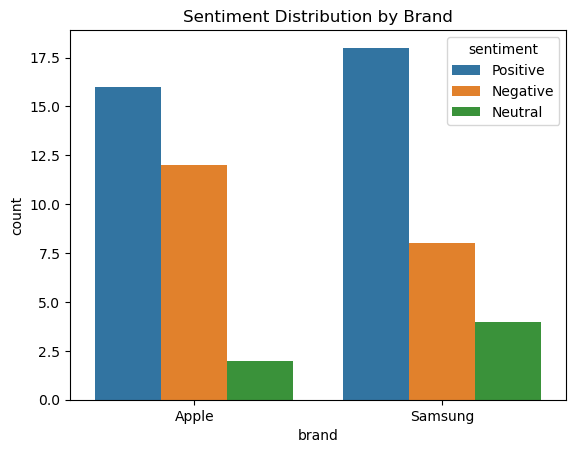

In [12]:
sns.countplot(x='brand', hue='sentiment', data=df)
plt.title("Sentiment Distribution by Brand")
plt.show()


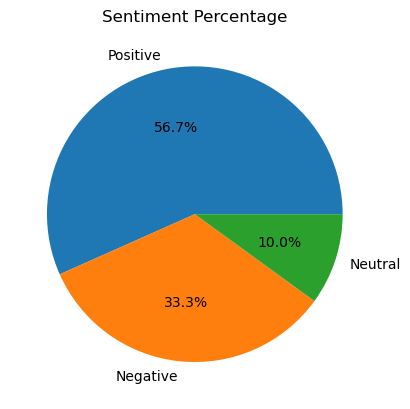

In [13]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Sentiment Percentage")
plt.ylabel("")
plt.show()


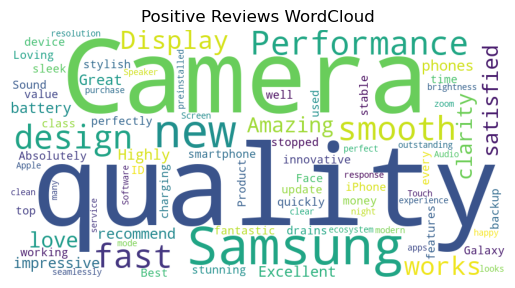

In [14]:
positive_text = " ".join(df[df['sentiment']=="Positive"]['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive Reviews WordCloud")
plt.show()


In [15]:
print(df.groupby('brand')['polarity'].mean())


brand
Apple      0.094510
Samsung    0.206384
Name: polarity, dtype: float64
